# Unsupervised dimensionality reduction via principal component analysis

Principal compoennt analysis(PCA)

In [1]:
import pandas as pd

In [2]:
df_wines = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
from sklearn.cross_validation import train_test_split

D:\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X, y = df_wines.iloc[:, 1:].values, df_wines.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [7]:
sc = StandardScaler()

In [8]:
X_train_std = sc.fit_transform(X_train)

In [9]:
X_test = sc.transform(X_test)

Covariance matrix

In [10]:
import numpy as np

In [11]:
cov_mat = np.cov(X_train_std.T)

In [12]:
cov_mat.shape

(13, 13)

In [13]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [14]:
eigen_vals

array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
        0.60181514,  0.52251546,  0.08414846,  0.33051429,  0.29595018,
        0.16831254,  0.21432212,  0.2399553 ])

In [15]:
tot = sum(eigen_vals)

In [16]:
var_exp = sorted(eigen_vals/tot, reverse=True)

In [17]:
cum_var_exp = np.cumsum(var_exp)

In [18]:
import matplotlib.pyplot as plt

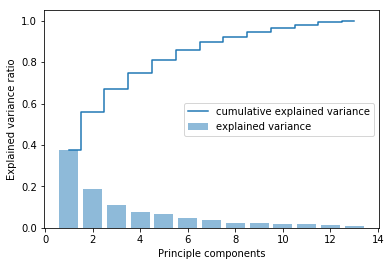

In [19]:
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, label='explained variance') # var_exp is an ordinary array , not np array
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle components')
plt.legend(loc='best')
plt.show()

Feature transformation

In [20]:
eigen_vecs.shape # each column is an eigenvector

(13, 13)

In [21]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [22]:
eigen_pairs.sort(reverse=True)

In [23]:
eigen_pairs[0][1]

array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])

In [24]:
eigen_pairs[0][1][:, np.newaxis]

array([[ 0.14669811],
       [-0.24224554],
       [-0.02993442],
       [-0.25519002],
       [ 0.12079772],
       [ 0.38934455],
       [ 0.42326486],
       [-0.30634956],
       [ 0.30572219],
       [-0.09869191],
       [ 0.30032535],
       [ 0.36821154],
       [ 0.29259713]])

In [25]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [26]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [27]:
X_train_pca = X_train_std.dot(w)

In [30]:
X_train_pca[y_train==1]

array([[ 2.59891628,  0.00484089],
       [ 1.36618015,  0.04639099],
       [ 2.53088166,  1.05798498],
       [ 0.54583852,  0.41042188],
       [ 3.5604963 ,  1.42561284],
       [ 3.30221023,  0.40939296],
       [ 2.76990407,  1.86073384],
       [ 2.06150478,  1.32280528],
       [ 3.52522122,  1.41880443],
       [ 1.70427554, -0.46267479],
       [ 3.14119715,  0.80251074],
       [ 2.34148171,  1.69991384],
       [ 3.57847538,  1.78146353],
       [ 3.82251943,  2.88150786],
       [ 2.51130377,  1.33358811],
       [ 2.20903303,  0.85715074],
       [ 4.37183355,  2.33594051],
       [ 3.31126031,  1.43233851],
       [ 2.81726412,  1.3810016 ],
       [ 1.85165682,  0.74908527],
       [ 1.96348867,  0.21556727],
       [ 2.23499535,  1.29680173],
       [ 0.81061036,  0.32968368],
       [ 2.3186051 , -0.12948205],
       [ 3.14731552,  1.31152545],
       [ 1.93435789,  1.6156844 ],
       [ 1.61938048, -0.63200211],
       [ 2.25520575,  1.89312658],
       [ 1.44705447,

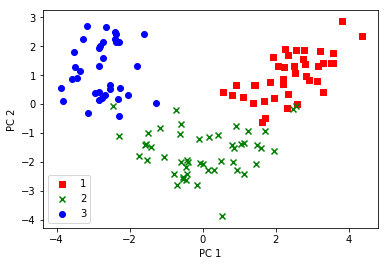

In [31]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for c, l, m in zip(colors, np.unique(y_train), markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) 
    # warning: not X_train_pca[y_train==l][0]
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [32]:
from matplotlib.colors import ListedColormap

In [33]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    #Z = classifier.predict(np.vstack((xx1.ravel(), xx2.ravel())).T)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], c=cmap(idx), marker=markers[idx], alpha=1, label=cl)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
lr = LogisticRegression()

In [37]:
X_train_pca = pca.fit_transform(X_train_std)

In [38]:
X_test_pca = pca.transform(X_test)

In [39]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

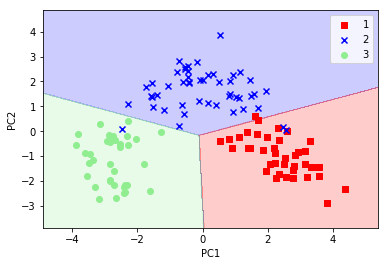

In [40]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

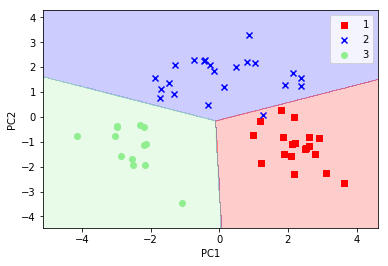

In [41]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Get explained variance ratios

In [42]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

In [43]:
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

# Supervised data compression via linear discriminant analysis

In [55]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [56]:
d = 13
S_W = np.zeros((d, d))
for label in range(1, 4):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [59]:
mean_overall = np.mean(X_train_std, axis=0)

In [65]:
mean_overall = mean_overall.reshape((d, 1))

In [62]:
S_B = np.zeros((d, d))

In [69]:
for label in range(1, 4):
    mean_vec = mean_vecs[label-1]
    mean_vec = mean_vec.reshape((d,1))
    n = len(y_train[y_train==label])
    S_B += n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

In [70]:
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [75]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [146]:
eigen_paris = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [147]:
np.abs(eigen_vals)

array([  0.0000e+00,   1.5644e+02,   4.5272e+02,   8.0640e-14,
         2.3574e-14,   2.3574e-14,   2.2906e-14,   2.2906e-14,
         1.4525e-14,   1.5824e-14,   1.5824e-14,   5.3195e-15,   9.5649e-16])

In [148]:
eigen_paris = sorted(eigen_paris, reverse=True, key=lambda k:k[0])

In [149]:
for eigen_val in eigen_paris:
    print(eigen_val[0])

452.721581245
156.43636122
8.0640207818e-14
2.35744446783e-14
2.35744446783e-14
2.29059366857e-14
2.29059366857e-14
1.5823729573e-14
1.5823729573e-14
1.45248013994e-14
5.3195234883e-15
9.56491799697e-16
0.0


In [150]:
tot = sum(eigen_vals.real)

In [151]:
discr = sorted(eigen_vals.real, reverse=True)/tot

In [152]:
cum_discr = np.cumsum(discr)

In [153]:
cum_discr.shape

(13,)

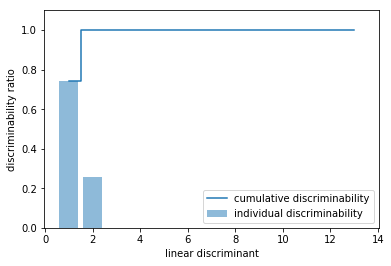

In [154]:
plt.bar(range(1, d+1), discr, alpha=0.5, label='individual discriminability')
plt.step(range(1, d+1), cum_discr, where='mid', label='cumulative discriminability')
plt.ylabel('discriminability ratio')
plt.xlabel('linear discriminant')
plt.ylim([0, 1.1])
plt.legend(loc='best')
plt.show()

Create the transformation matrix

In [178]:
eigen_vecs[:,4]

array([-0.7113+0.j    ,  0.0688-0.017j ,  0.3747+0.1178j, -0.2953+0.1422j,
       -0.0039-0.0098j, -0.1510+0.0665j,  0.0379-0.0366j,  0.0288+0.0555j,
       -0.0894+0.1126j,  0.1168+0.0583j, -0.0611+0.0534j,  0.0981+0.0365j,
        0.3703-0.0315j])

In [155]:
w = np.hstack((eigen_paris[0][1][:, np.newaxis].real, eigen_paris[1][1][:, np.newaxis].real))

In [156]:
w

array([[-0.0662, -0.3797],
       [ 0.0386, -0.2206],
       [-0.0217, -0.3816],
       [ 0.184 ,  0.3018],
       [-0.0034,  0.0141],
       [ 0.2326,  0.0234],
       [-0.7747,  0.1869],
       [-0.0811,  0.0696],
       [ 0.0875,  0.1796],
       [ 0.185 , -0.284 ],
       [-0.066 ,  0.2349],
       [-0.3805,  0.073 ],
       [-0.3285, -0.5971]])

In [179]:
X_train_lda = X_train_std.dot(w)

In [181]:
X_train_lda.shape

(124, 2)

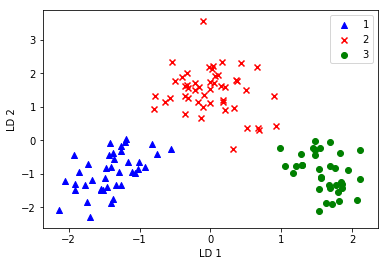

In [192]:
colors = ['blue', 'red', 'green']
markers = ['^', 'x', 'o']
for label in np.unique(y_train):
    plt.scatter(X_train_lda[y_train==label, 0], X_train_lda[y_train==label, 1], marker=markers[label-1], color=colors[label-1], label=label)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

LDA via scikit-learn

In [197]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

In [199]:
import sklearn
sklearn.__version__

'0.19.1'

In [206]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [207]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

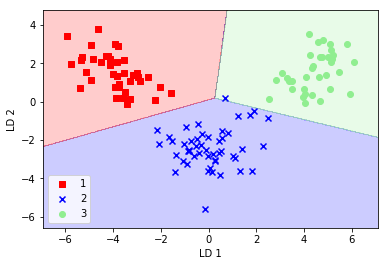

In [208]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

In [210]:
X_test_lda = lda.transform(X_test)

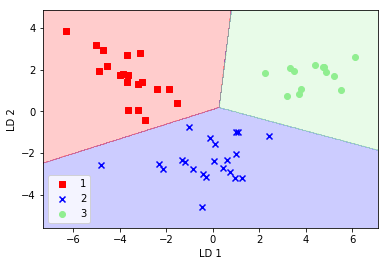

In [212]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

# Kernel PCA for nonlinear mappings

In [266]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel (Gaussian kernel) PCA implementation.
    
    Parameters
    -------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tunning parameter of the RBF kernel
        
    n_components: int
        number of principal components to return
        
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
        projected dataset
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigenvals, eigvecs = eigh(K)
    
    print("eigen vectors:")
    print("%s x %s" % (eigvecs.shape[0],eigvecs.shape[1]))
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

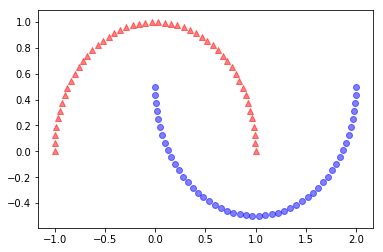

In [249]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

In [250]:
from sklearn.decomposition import PCA

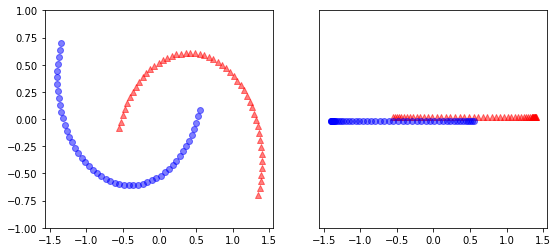

In [260]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_yticks([])
ax[1].set_ylim([-1,1])
ax[0].set_ylim([-1,1])
plt.show()

eigen vectors:
100 x 100


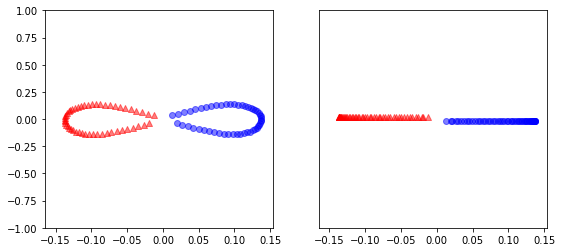

In [267]:
from  matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_yticks([])
ax[1].set_ylim([-1,1])
ax[0].set_ylim([-1,1])
plt.show()

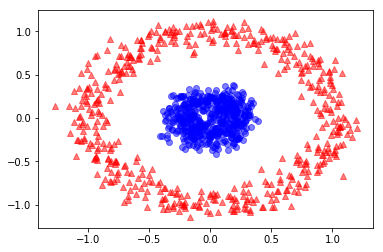

In [268]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

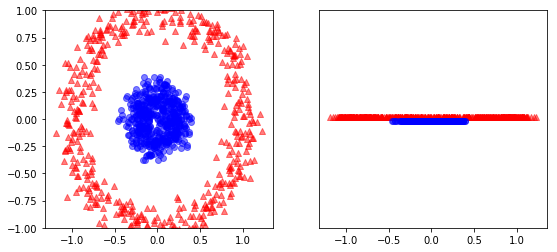

In [271]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_yticks([])
ax[1].set_ylim([-1,1])
ax[0].set_ylim([-1,1])
plt.show()

eigen vectors:
1000 x 1000


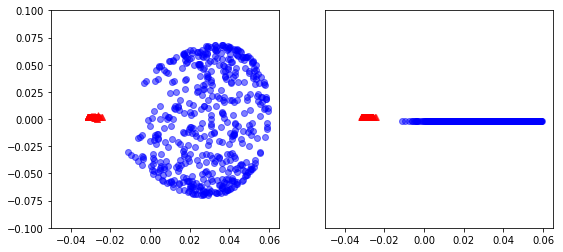

In [277]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.002, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.002, color='blue', marker='o', alpha=0.5)
ax[1].set_yticks([])
ax[1].set_ylim([-0.1,0.1])
ax[0].set_ylim([-0.1,0.1])
plt.show()

# Projecting new data points

In [279]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca_mod(X, gamma, n_components):
    """
    RBF kernel (Gaussian kernel) PCA implementation.
    
    Parameters
    -------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tunning parameter of the RBF kernel
        
    n_components: int
        number of principal components to return
        
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
        projected dataset
        
    lambdas: list
        Eigenvalues
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigenvals, eigvecs = eigh(K)
    
    print("eigen vectors:")
    print("%s x %s" % (eigvecs.shape[0],eigvecs.shape[1]))
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    # Collect the corresponding eigenvalues
    lambdas = [eigenvals[-i] for i in range(1, n_components+1)]
    
    return X_pc, lambdas

In [280]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca_mod(X, 15, 1)

eigen vectors:
100 x 100


In [281]:
x_new = X[25]
x_new

array([ 1.8713,  0.0093])

In [283]:
x_proj = alphas[25]
x_proj

array([ 0.0788])

In [284]:
def project_x(x_new, X, gamma, alphas, lambdas):
    dists = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * dists)
    return k.dot(alphas/lambdas)

In [286]:
x_reproj = project_x(x_new,X, 15, alphas, lambdas)

In [287]:
x_reproj

array([ 0.0788])